### Name : S.M.Hedayatullah
### Enroll No. 0010

# Machine Learing -Binary Classification

 Decision Tree (we ll see classification here)

In [ ]:
# Binary Classification
# Dataset :  news_data.csv , sample_news.txt
# Location : https://mitu.co.in/dataset . Download and save in current working dorectory

In [ ]:
import os
os.getcwd()

In [3]:
os.listdir(os.getcwd())  # give all the files in cwd . we can check if our desired file is there or not

['.ipynb_checkpoints',
 'Deccan Advanced Class 1 and 2.ipynb',
 'news_data.csv',
 'sample_news.txt',
 'Sample_resume.txt',
 'session 7.ipynb',
 'Session New _8 Machine Learning Multiclass Classification.ipynb',
 'Session_3_Deccan.ipynb',
 'Session_4.2_Deccan.ipynb',
 'Session_4_Deccan.ipynb',
 'Session_5 and 6_Deccan.ipynb',
 'Untitled.ipynb',
 'UpdatedResumeDataSet.csv']

In [ ]:
# news_data is a huge data and contains real or fake news data

Import the libraries

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Read the Dataset

In [5]:
df = pd.read_csv('news_data.csv')

In [6]:
df.shape

(9900, 2)

In [7]:
df.columns     # Shows the 2 columns 

Index(['Text', 'label'], dtype='object')

##### Separate the input and output Data

In [8]:
features = df['Text']   # Input Data
label = df['label']     # Output Data

In [9]:
features.head()

0     Top Trump Surrogate BRUTALLY Stabs Him In The...
1    U.S. conservative leader optimistic of common ...
2    Trump proposes U.S. tax overhaul, stirs concer...
3     Court Forces Ohio To Allow Millions Of Illega...
4    Democrats say Trump agrees to work on immigrat...
Name: Text, dtype: object

In [10]:
label.head()

0    Fake
1    Real
2    Real
3    Fake
4    Real
Name: label, dtype: object

In [11]:
# Check how many values re there in respective categories
set(label)

{'Fake', 'Real'}

In [12]:
df['label'].unique()

array(['Fake', 'Real'], dtype=object)

<AxesSubplot:xlabel='label', ylabel='count'>

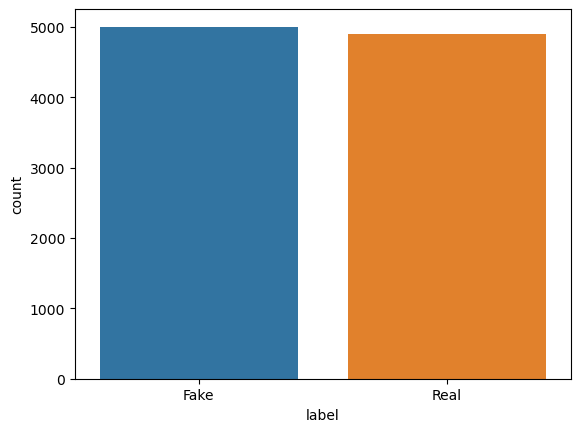

In [13]:
# To check how many Fake and How many Real
sns.countplot(x = label)

In [14]:
label.value_counts()

Fake    5000
Real    4900
Name: label, dtype: int64

In [ ]:
# If the data is imbalanced , there is a method called resampling to make our data balanced

([<matplotlib.patches.Wedge at 0x13ee4ae3340>,
 [Text(-0.017452474924647392, 1.0998615417946955, 'Fake'),
  Text(0.017452371948178103, -1.0998615434287093, 'Real')],
 [Text(-0.009519531777080396, 0.599924477342561, '50.51%'),
  Text(0.009519475608097145, -0.5999244782338414, '49.49%')])

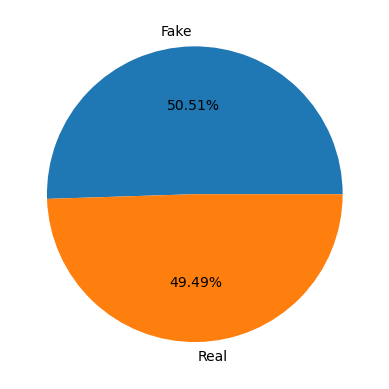

In [15]:
# To check the data is balanced or not we can also see through pie chart
plt.pie(label.value_counts(), labels = label.value_counts().index, autopct='%2.2f%%')

In [ ]:
# We ll train the model , we require the data in numeric form . We will use TF-IDF but first we clean the data

In [ ]:
# Cleaning First
# Then vetorizing 

# Data Preparation 

Data Cleaning

In [ ]:
# Steps : Tokenize, change to lower case, remove punctuation , affixes , remove stop words -- Only keywords needed

In [16]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [17]:
# just a demo
sent = 'Hello friends! How are you? I like Python Programming'

In [18]:
# Tokenize
tokens1 = word_tokenize(sent)

In [19]:
tokens1

['Hello',
 'friends',
 '!',
 'How',
 'are',
 'you',
 '?',
 'I',
 'like',
 'Python',
 'Programming']

In [20]:
# remove punctuations
tokens2 = [x for x in tokens1 if x.isalpha()]
tokens2

['Hello', 'friends', 'How', 'are', 'you', 'I', 'like', 'Python', 'Programming']

In [21]:
# remove stopwords 
swords = stopwords.words('english')
swords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
# removng stopwords
tokens3 = [x for x in tokens2 if x not in swords]
tokens3

['Hello', 'friends', 'How', 'I', 'like', 'Python', 'Programming']

In [23]:
# remove suffixes 
ps = PorterStemmer()
tokens4 = [ps.stem(x) for x in tokens3]
tokens4

['hello', 'friend', 'how', 'i', 'like', 'python', 'program']

In [24]:
# Before Vectorizing the text , we define a function using the above lines so that we can use it for a larger text
# Defining a function for text Cleaning
def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [x for x in tokens1 if x.isalpha()]
    tokens3 = [x for x in tokens2 if x not in swords]
    tokens4 = [ps.stem(x) for x in tokens3]
    return tokens4

# We ll use this function before Vectorization

In [25]:
clean_text(sent)  #

['hello', 'friend', 'how', 'i', 'like', 'python', 'program']

In [26]:
# Lets see an example 
new_sent = 'It was the expected result. They told the same on fields.'
clean_text(new_sent)

['it', 'expect', 'result', 'they', 'told', 'field']

In [27]:
# Lets see the sentences number 123, whihc is basically our feature number 123
clean_text(features[123])

['rank',
 'dem',
 'on',
 'hous',
 'russia',
 'probe',
 'ha',
 'explos',
 'new',
 'for',
 'trump',
 'that',
 'will',
 'have',
 'him',
 'run',
 'scare',
 'as',
 'everybodi',
 'still',
 'believ',
 'democraci',
 'true',
 'freedom',
 'reel',
 'fbi',
 'director',
 'jame',
 'comey',
 'fire',
 'media',
 'member',
 'congress',
 'frantic',
 'work',
 'get',
 'deet',
 'happen',
 'adam',
 'schiff',
 'rank',
 'member',
 'hous',
 'intellig',
 'committe',
 'conduct',
 'investig',
 'russia',
 'drop',
 'truth',
 'bomb',
 'comey',
 'trump',
 'would',
 'wise',
 'go',
 'find',
 'cave',
 'hide',
 'ask',
 'cnn',
 'whether',
 'believ',
 'he',
 'he',
 'think',
 'someth',
 'wors',
 'it',
 'brazen',
 'interfer',
 'crimin',
 'investig',
 'after',
 'presid',
 'call',
 'whole',
 'investig',
 'fake',
 'fbi',
 'director',
 'serious',
 'look',
 'whether',
 'trump',
 'associ',
 'collud',
 'russian',
 'the',
 'end',
 'statement',
 'cnn',
 'particularli',
 'jar',
 'anybodi',
 'familiar',
 'histori',
 'watch',
 'adam',
 '

### TF_IDF Vectorization

In [28]:
# import the class 
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
# create object
tfidf = TfidfVectorizer(analyzer=clean_text)    
# Before Vectorization , cleaning is done and the clean text is passed to get vectorized

In [31]:
# Perform the Operation
features_new = tfidf.fit_transform(features)
features_new

<9900x33653 sparse matrix of type '<class 'numpy.float64'>'
	with 1561174 stored elements in Compressed Sparse Row format>

In [32]:
features_new.shape

(9900, 33653)

In [33]:
len(tfidf.get_feature_names_out())

33653

In [ ]:
# Now essential Step 
# How to find the accuracy of the model . How to evaluate? Cross Validation ppt
# Cross Validation / Holdout Method

#### Cross Validation

In [34]:
# import the function
from sklearn.model_selection import train_test_split

In [35]:
# Perfom Cross-validation 
x_train, x_test,y_train, y_test = train_test_split (features_new, label, random_state = 0)   
# Where did we specify the percentage ?

In [52]:
x_train.shape

(7425, 33653)

In [53]:
x_test.shape

(2475, 33653)

In [54]:
y_train.shape

(7425,)

In [ ]:
y_test.shape

In [ ]:
x_train[0]

In [ ]:
y_train[0]

#### Building the Decision Tree Algorithm on the Training data

In [42]:
# Import the class
from sklearn.tree import DecisionTreeClassifier

In [43]:
# Create the object
dt = DecisionTreeClassifier(random_state=0)

In [44]:
# train the algorithm
dt.fit(x_train, y_train)  # This will create the Tree

DecisionTreeClassifier(random_state=0)

In [45]:
# To see the Tree
from sklearn.tree import plot_tree

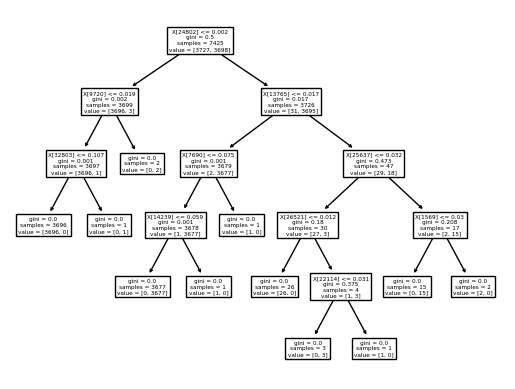

In [48]:
plot_tree(dt);     # It ll show only the important Features and take only them into account

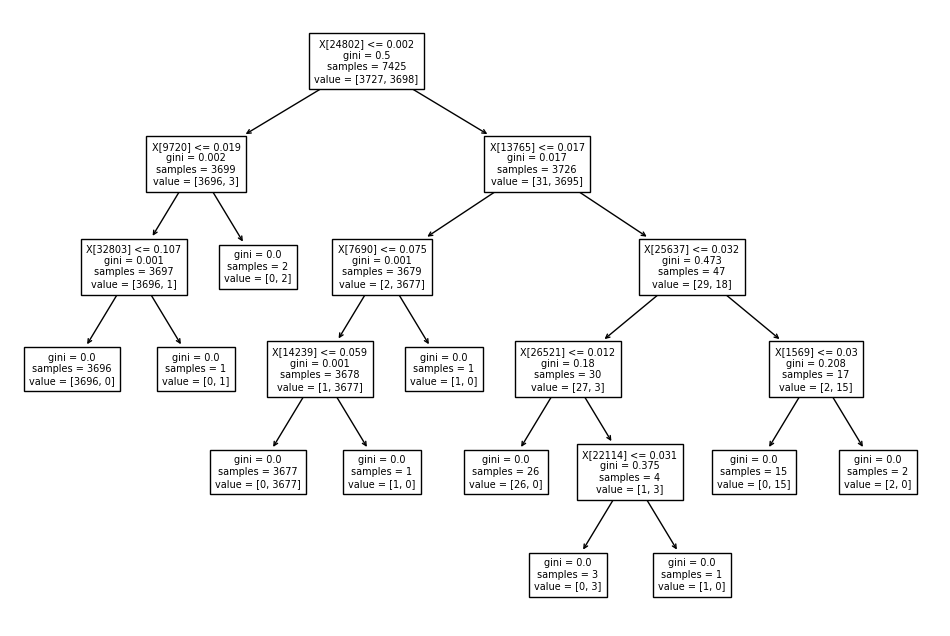

In [58]:
plt.figure(figsize=(12,8))
plot_tree(dt, fontsize =7);    # Only 10 features are taken to draw the tree which are imp 

In [60]:
# To see the exact root node feature 
tfidf.get_feature_names_out()[24802]

'reuter'

#### Performance Evaluation

In [49]:
# Predict the result on test data
y_pred = dt.predict(x_test)
y_pred     # Alogrithm predicted Data

array(['Fake', 'Fake', 'Fake', ..., 'Fake', 'Fake', 'Fake'], dtype=object)

In [50]:
len(y_pred)

2475

In [51]:
y_test  # Print and compare with y_pred

6688    Fake
5766    Fake
6335    Fake
5857    Real
7323    Real
        ... 
14      Real
5489    Real
6953    Fake
6780    Fake
6727    Fake
Name: label, Length: 2475, dtype: object

#  8th Session

In [61]:
# Confusion matrix ppt
# import the class 
from sklearn.metrics import ConfusionMatrixDisplay

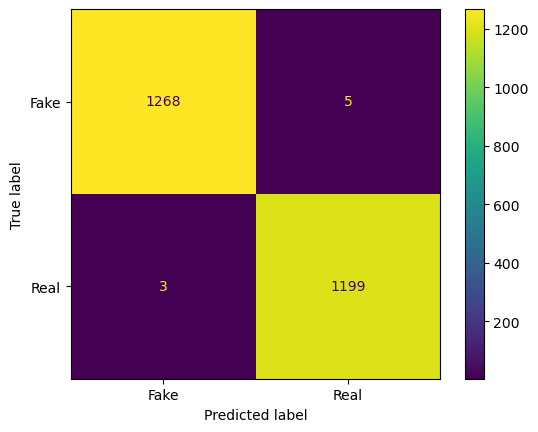

In [62]:
# Show the matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [68]:
(1269+1199)/2475

0.9971717171717172

In [ ]:
# Fake Class
1269/1273

In [ ]:
# Real Class
1199/1202

## Prediction on Unseen New news using our Decision Tree  model

In [63]:
f = open('sample_news.txt', encoding = 'utf-8')

In [64]:
news = f.readlines()
news

['" Donald Trump’s ‘Charity’ Foundation Is About To Be Shut The F**k Down NATIONWIDE Things really aren t looking too great for Donald Trump s charity foundation. With recent developments prohibiting the Trump Foundation from soliciting funds in New York state, it s now looking like a good majority of states may be following suit.The Trump Foundation has also been being looked at by the Attorney General for how it is getting and spending funds, especially after what happen with veterans organizations earlier this year.According to The Daily Beast: To make matters worse for the Trump Foundation, the probe may not be limited to New York: Charity experts and lawyers tell The Daily Beast that the attorneys general of other states may soon get involved in a long, drawn-out process.All major charities are required to register with 41 different states across the nation in order to individually request permission to fundraise. When Trump raised money for veterans, he may have broken the rules 

In [70]:
len(news)    # There are 3 news/sentences

3

In [71]:
tfidf.transform(news)      # Transforming and applying... We need to vectorize(change to Matrix form) first before predicting

<3x33653 sparse matrix of type '<class 'numpy.float64'>'
	with 359 stored elements in Compressed Sparse Row format>

In [72]:
dt.predict(tfidf.transform(news))        # Predicting

array(['Fake', 'Real', 'Fake'], dtype=object)

### Next we ll learn Machine learning on Multi-class Classification